In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math
from lasso_func import *

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Vary m, relevant x-variables, and covariates together

In [2]:
def vary_xvars_m_num_cov(model):
    m_list = [[1, 1/5, 1/15, 1/20], [1, 1/math.sqrt(5), 1/math.sqrt(15), 1/math.sqrt(20)], [1, 1/(5)**2, 1/(15)**2, 1/(20)**2],
         [1, 2/math.sqrt(5), 2/math.sqrt(15), 2/math.sqrt(20)], [0.5, 2/(0.5/math.sqrt(5)), 2/(0.5/math.sqrt(15)), 2/(0.5/math.sqrt(20))]]
    a = 0.1
    n = 1000
    for m in m_list:
        print(m)
        k = [1,5,15,20]
        c = [24,20,10,5]
        for i, j, k in zip(k, c, m):
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=k, num_relevant_cov=j)
            x = setup_test_params(y, x_1, x_2, a, model)
            lst = []
            for l in range(1000):
                results = setup_test_mse(n, i, a, k, j, model)
                lst.append(results)
            output = mse(lst, n, i, model)
        plt.legend()
        plt.show()

[1, 0.2, 0.06666666666666667, 0.05]
Mean: 22.477390265459775 Median: 22.489685089356012 Mode: [[19.78644438]] Variance: 0.701970414314798
Mean: 22.431434989561144 Median: 22.398898811316656 Mode: [[19.89580061]] Variance: 0.7012890327918296
Mean: 22.46923966143884 Median: 22.46779343472064 Mode: [[19.55145877]] Variance: 0.7128221818866947
Mean: 22.477254582529298 Median: 22.45498344716492 Mode: [[19.59087533]] Variance: 0.7070566960510541


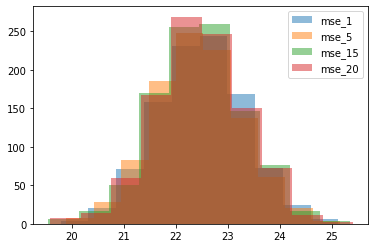

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: 22.44811648645097 Median: 22.48279582718731 Mode: [[19.40625199]] Variance: 0.7005824268002654
Mean: 22.462139916654447 Median: 22.42946753973721 Mode: [[18.97596561]] Variance: 0.6907564939407016
Mean: 22.461141496000113 Median: 22.438609668894994 Mode: [[19.66129757]] Variance: 0.6931452014430683
Mean: 22.47778884935763 Median: 22.49533390108942 Mode: [[19.29778149]] Variance: 0.7845626909434552


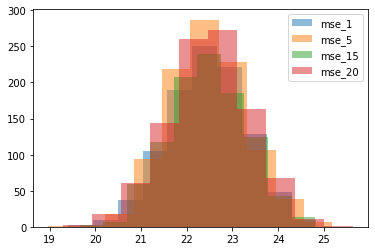

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: 22.39924989887564 Median: 22.39297919970731 Mode: [[19.64292076]] Variance: 0.6898713516153818
Mean: 22.46476600871967 Median: 22.494637004564208 Mode: [[19.69231715]] Variance: 0.7689054924118405
Mean: 22.42983596701528 Median: 22.4783596273701 Mode: [[19.99483698]] Variance: 0.6860824694117552
Mean: 22.41654164298526 Median: 22.410613167070053 Mode: [[19.00238377]] Variance: 0.771328002453573


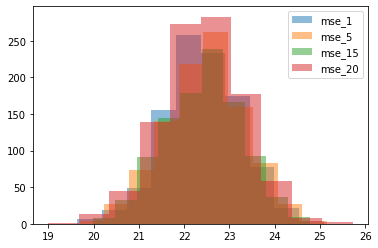

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: 22.46372798637797 Median: 22.44954517916601 Mode: [[19.49681918]] Variance: 0.7173388724254002
Mean: 22.446206203507987 Median: 22.427975021206485 Mode: [[20.05549165]] Variance: 0.6799371285923808
Mean: 22.47107376357784 Median: 22.48263712130114 Mode: [[18.61581098]] Variance: 0.7121573770991921
Mean: 22.446958929885056 Median: 22.472169543005656 Mode: [[19.68563027]] Variance: 0.7276976772525123


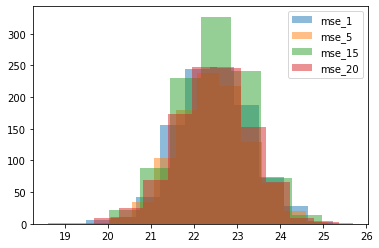

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: 22.458782838585524 Median: 22.441721755571656 Mode: [[19.33201224]] Variance: 0.6811124190757257
Mean: 22.46707343081059 Median: 22.48095607166558 Mode: [[19.57931983]] Variance: 0.7236351715235793
Mean: 22.42194186505091 Median: 22.448103391146482 Mode: [[19.5854913]] Variance: 0.7299889491182412
Mean: 22.458456492182236 Median: 22.496346741813184 Mode: [[19.71381566]] Variance: 0.750669944053387


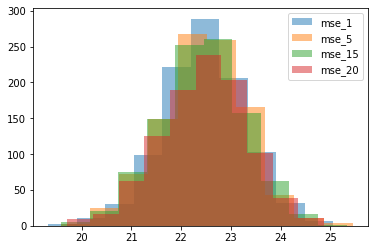

In [3]:
vary_xvars_m_num_cov(1)

[1, 0.2, 0.06666666666666667, 0.05]
Mean: 22.42450171624277 Median: 22.466803634805665 Mode: [[19.4865332]] Variance: 0.74789993412321
Mean: 22.43365918455991 Median: 22.433267209779206 Mode: [[19.46196124]] Variance: 0.6925612489544178
Mean: 22.415861058135743 Median: 22.374392774292772 Mode: [[19.65043344]] Variance: 0.6569953436081608
Mean: 22.409183512065827 Median: 22.4494305142543 Mode: [[18.81680505]] Variance: 0.7364949948832955


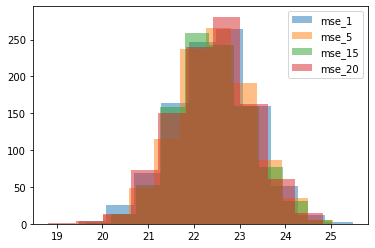

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: 22.4206654166164 Median: 22.436643194350978 Mode: [[19.73067396]] Variance: 0.7062403317976316
Mean: 22.410773787225875 Median: 22.441681460200236 Mode: [[19.17403372]] Variance: 0.7701403460403359
Mean: 22.45648856763713 Median: 22.43462408449767 Mode: [[18.70972158]] Variance: 0.785239588197132
Mean: 22.430375724144564 Median: 22.448956030531498 Mode: [[19.88237286]] Variance: 0.7016689150959141


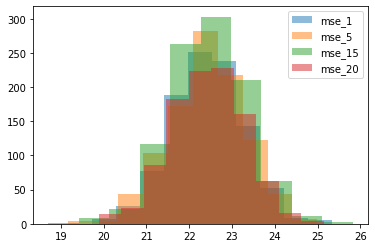

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: 22.483477641675055 Median: 22.51613374518437 Mode: [[19.47607642]] Variance: 0.7860865652776656
Mean: 22.434795524093058 Median: 22.440499568085784 Mode: [[19.73475534]] Variance: 0.740587426528333
Mean: 22.392228184206804 Median: 22.381813801789523 Mode: [[19.47075995]] Variance: 0.6997358771755432
Mean: 22.400457660934038 Median: 22.41025871958683 Mode: [[19.07569275]] Variance: 0.7611379240668045


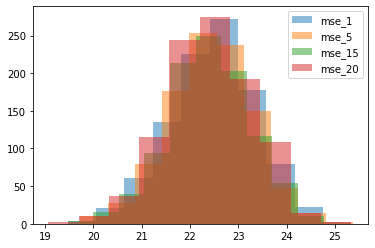

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: 22.491639891247548 Median: 22.506121106812312 Mode: [[19.49278211]] Variance: 0.7290883788659884
Mean: 22.409418483439683 Median: 22.420747683440812 Mode: [[19.51039771]] Variance: 0.7205401611392028
Mean: 22.391258259361585 Median: 22.390204364373837 Mode: [[19.28667626]] Variance: 0.7859763158679167
Mean: 22.451736948635748 Median: 22.477239441317227 Mode: [[19.91261696]] Variance: 0.7090964108394835


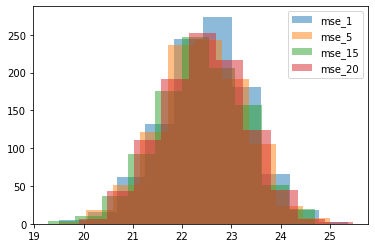

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: 22.38712628109733 Median: 22.338618038175113 Mode: [[19.70669306]] Variance: 0.7190832681905562
Mean: 22.482859464371796 Median: 22.493782151380543 Mode: [[19.9591802]] Variance: 0.7520119893646706
Mean: 22.440728516459618 Median: 22.49975280631392 Mode: [[19.3979114]] Variance: 0.7504399454101831
Mean: 22.429829560118815 Median: 22.44989623314599 Mode: [[19.24660195]] Variance: 0.6719480930290482


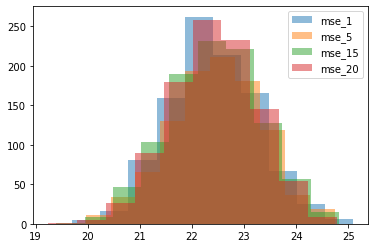

In [4]:
vary_xvars_m_num_cov(2)

[1, 0.2, 0.06666666666666667, 0.05]
Mean: 22.430891160433827 Median: 22.462202372332676 Mode: [[19.71148403]] Variance: 0.7115366199363822
Mean: 22.4557222020825 Median: 22.45550599460727 Mode: [[19.65084168]] Variance: 0.6852911866305897
Mean: 22.437880056974457 Median: 22.437320388956266 Mode: [[19.60392728]] Variance: 0.728081819135401
Mean: 22.418214023284307 Median: 22.442392825999285 Mode: [[18.6571535]] Variance: 0.757787965503908


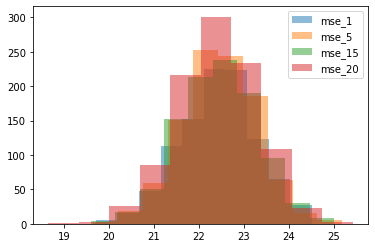

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: 22.417099850836408 Median: 22.46248871841058 Mode: [[19.84294371]] Variance: 0.6981934958906555
Mean: 22.411702883784493 Median: 22.41021243982099 Mode: [[18.95551473]] Variance: 0.7282828459908662
Mean: 22.44578003755609 Median: 22.492709228647378 Mode: [[18.72038742]] Variance: 0.7327095374261071
Mean: 22.458342461822635 Median: 22.459156725384126 Mode: [[18.48269496]] Variance: 0.6981064458388608


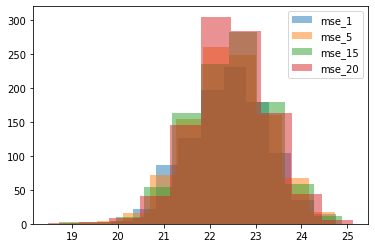

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: 22.413274175725768 Median: 22.388420514046693 Mode: [[19.44472557]] Variance: 0.7429341171533017
Mean: 22.43407609973778 Median: 22.46142735842496 Mode: [[19.39675813]] Variance: 0.7124234122016548
Mean: 22.45062842476772 Median: 22.44932073408696 Mode: [[19.74263926]] Variance: 0.7723132085212594
Mean: 22.44604276903108 Median: 22.46398780171149 Mode: [[19.451871]] Variance: 0.7324875978359742


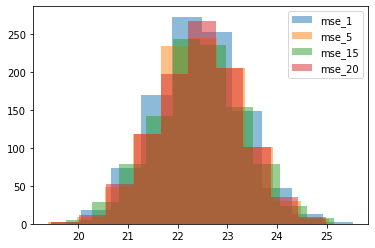

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: 22.40750758196846 Median: 22.406706629439704 Mode: [[19.00561826]] Variance: 0.6904618452220151
Mean: 22.449183012210035 Median: 22.467039407408663 Mode: [[19.47906822]] Variance: 0.7205873617317161
Mean: 22.458505817182008 Median: 22.4680684034513 Mode: [[20.069584]] Variance: 0.7166649594537642
Mean: 22.418032003878004 Median: 22.42423185753381 Mode: [[18.94863181]] Variance: 0.755475357894409


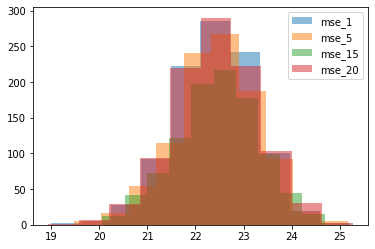

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: 22.474144254585873 Median: 22.468523732648343 Mode: [[19.73986398]] Variance: 0.70314435911003
Mean: 22.475601455249144 Median: 22.473512495769093 Mode: [[19.96229351]] Variance: 0.716947931440689
Mean: 22.444533692311154 Median: 22.472526809688098 Mode: [[19.33454207]] Variance: 0.7335216707290317
Mean: 22.42305000461451 Median: 22.418302527221016 Mode: [[19.15844195]] Variance: 0.7062008884084084


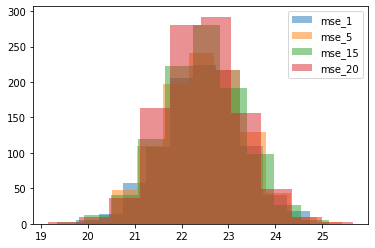

In [5]:
vary_xvars_m_num_cov(3)

[1, 0.2, 0.06666666666666667, 0.05]
Mean: -7.543156660224157 Median: -7.537281127231431 Mode: [[-8.92883345]] Variance: 0.10967817753675922
Mean: -6.978194312060649 Median: -6.970485466057834 Mode: [[-7.93930197]] Variance: 0.08979504363771196
Mean: -3.9782411273912093 Median: -3.962949358328273 Mode: [[-5.40986728]] Variance: 0.16529915771221454
Mean: -3.0169910739780197 Median: -3.0188590298297573 Mode: [[-4.25796646]] Variance: 0.14708354495754328


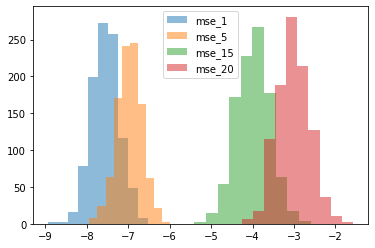

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: -7.528048512903614 Median: -7.527144382632991 Mode: [[-8.86488334]] Variance: 0.11080670719875232
Mean: -6.977019738387708 Median: -6.969746630023392 Mode: [[-7.99473514]] Variance: 0.09583259510917101
Mean: -5.310020405244218 Median: -5.30941598466517 Mode: [[-6.18540194]] Variance: 0.06655926777529003
Mean: -4.176185480480746 Median: -4.170379506847205 Mode: [[-5.08984622]] Variance: 0.05569203842652919


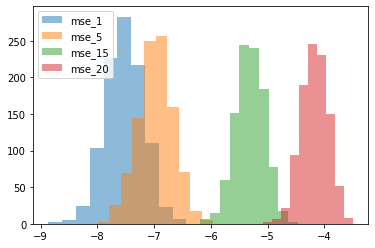

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: -7.5080843733105675 Median: -7.517244013187325 Mode: [[-8.71791654]] Variance: 0.11123092725073846
Mean: -3.6865201233140357 Median: -3.6993576857177475 Mode: [[-5.00350134]] Variance: 0.19043792151081215
Mean: -2.510565254083716 Median: -2.503746547755026 Mode: [[-3.98182463]] Variance: 0.1364593185910335
Mean: -2.5169369660703107 Median: -2.5156158978330634 Mode: [[-3.65277543]] Variance: 0.1354572713976326


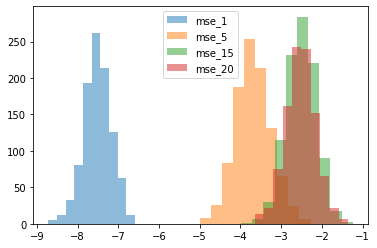

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: -7.518550200579106 Median: -7.5017499787714765 Mode: [[-8.72906545]] Variance: 0.10059574156693563
Mean: -6.9838733687573615 Median: -6.979403425743758 Mode: [[-7.96344419]] Variance: 0.08735075859685955
Mean: -5.313736277371104 Median: -5.3216970400949695 Mode: [[-6.14960657]] Variance: 0.06320043850093278
Mean: -4.187337776277408 Median: -4.170920929707509 Mode: [[-4.92565825]] Variance: 0.062315046221921196


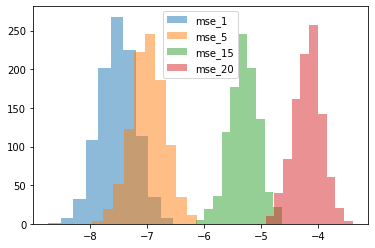

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: -7.517990274966025 Median: -7.519869075333434 Mode: [[-8.67121213]] Variance: 0.11269534882730223
Mean: -7.000026792616163 Median: -6.998760402631838 Mode: [[-8.13619963]] Variance: 0.0934195858240533
Mean: -5.321026664687442 Median: -5.318189722787897 Mode: [[-6.36607457]] Variance: 0.06771169196631868
Mean: -4.16824237634511 Median: -4.160300991099588 Mode: [[-5.08698034]] Variance: 0.05631708459153239


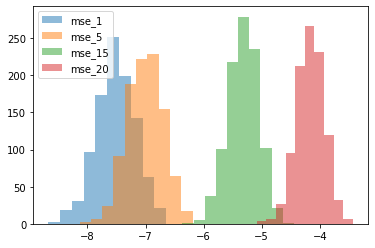

In [6]:
vary_xvars_m_num_cov(4)

[1, 0.2, 0.06666666666666667, 0.05]
Mean: -6.862186608709864 Median: -6.865464268137195 Mode: [[-7.86730973]] Variance: 0.08338528436376984
Mean: -1.3351809342690735 Median: -1.3342641990799513 Mode: [[-1.61369447]] Variance: 0.005680232582016
Mean: -0.3894215517492946 Median: -0.3872607180613138 Mode: [[-0.53161368]] Variance: 0.002309917133602126
Mean: -0.2892717617768908 Median: -0.28691526525107314 Mode: [[-0.43947589]] Variance: 0.0018797079292287514


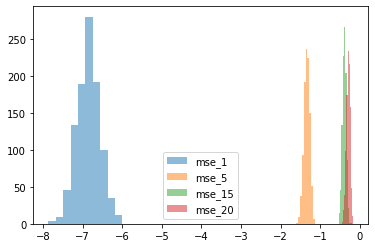

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: -6.876349308674655 Median: -6.873625492457963 Mode: [[-7.74927051]] Variance: 0.08010974005261133
Mean: -2.927397520245914 Median: -2.924408745631852 Mode: [[-3.39329896]] Variance: 0.01782443838479554
Mean: -1.2215660846708105 Median: -1.219246059138832 Mode: [[-1.4586918]] Variance: 0.00517522385202731
Mean: -0.7709540358487674 Median: -0.7694950752347004 Mode: [[-0.99278676]] Variance: 0.0033933373669541044


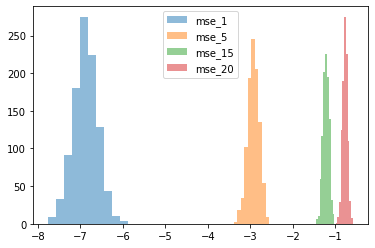

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: -6.876695522174025 Median: -6.877296948312159 Mode: [[-7.71533331]] Variance: 0.08529738238169449
Mean: -0.3529533712056159 Median: -0.3510746806568388 Mode: [[-0.50530332]] Variance: 0.002017227471665267
Mean: -0.2367893034030704 Median: -0.23521646164698806 Mode: [[-0.36998413]] Variance: 0.0012697951226842824
Mean: -0.23521011778469186 Median: -0.2336029095126914 Mode: [[-0.36612814]] Variance: 0.001271390402911536


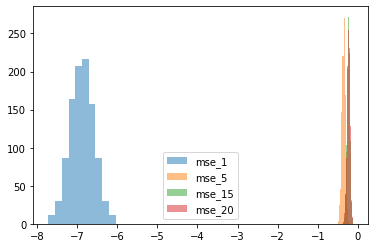

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: -6.865324666485983 Median: -6.863714204752567 Mode: [[-7.80472637]] Variance: 0.08505472010625001
Mean: -5.698558199493018 Median: -5.699229470427755 Mode: [[-6.5380118]] Variance: 0.06180445011224211
Mean: -2.405836916300098 Median: -2.400477357256798 Mode: [[-2.78941277]] Variance: 0.012375547645898223
Mean: -1.49144550284807 Median: -1.494087965696966 Mode: [[-1.73782441]] Variance: 0.0061219459442976255


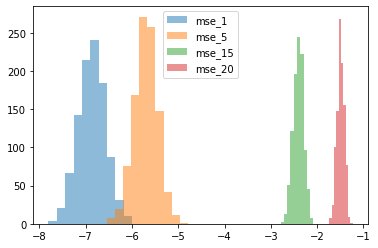

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: -3.572690242312665 Median: -3.57756688879602 Mode: [[-4.11818508]] Variance: 0.025582250948966677
Mean: -20.99790665009169 Median: -20.9997371739942 Mode: [[-23.23707506]] Variance: 0.6731239424342573
Mean: -21.414168317260646 Median: -21.44878800050909 Mode: [[-23.8174144]] Variance: 0.6864440471516021
Mean: -20.995303896387856 Median: -21.01381883912612 Mode: [[-23.27700684]] Variance: 0.60234111106797


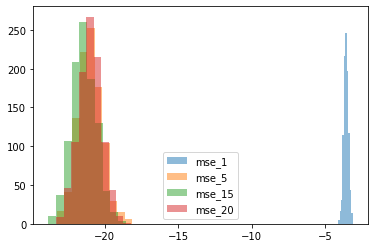

In [7]:
vary_xvars_m_num_cov(5)

[1, 0.2, 0.06666666666666667, 0.05]
Mean: 10.811389315160797 Median: 11.138802044516327 Mode: [[6.0557301]] Variance: 1.6979265623204092
Mean: 8.05974875809065 Median: 8.043965517022457 Mode: [[6.87003667]] Variance: 0.13331986249676697
Mean: 4.324620567072481 Median: 4.332140520527437 Mode: [[2.86715494]] Variance: 0.1856419905573755
Mean: 3.298398802843414 Median: 3.31169797819981 Mode: [[1.8123073]] Variance: 0.18738157703030367


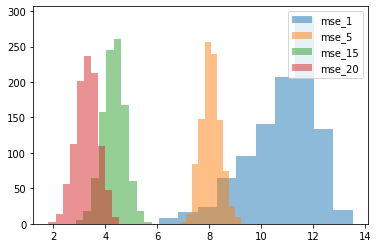

[1, 0.4472135954999579, 0.2581988897471611, 0.22360679774997896]
Mean: 10.768775781584983 Median: 11.034999273377025 Mode: [[6.21932434]] Variance: 1.725658513278764
Mean: 9.264907429279246 Median: 9.259063434833944 Mode: [[8.06543497]] Variance: 0.16223486759226513
Mean: 6.3171603945551995 Median: 6.314321305678706 Mode: [[5.42877709]] Variance: 0.08680603424151258
Mean: 4.837580522041178 Median: 4.837072293577514 Mode: [[3.88997272]] Variance: 0.06876435294745564


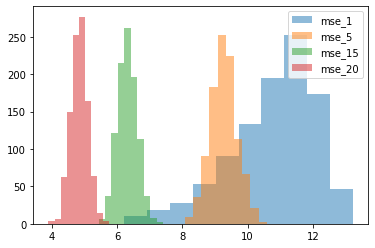

[1, 0.04, 0.0044444444444444444, 0.0025]
Mean: 10.843147002517012 Median: 11.150724171530529 Mode: [[6.46434267]] Variance: 1.5884822796331681
Mean: 4.02433194035219 Median: 4.039402445240407 Mode: [[2.22818117]] Variance: 0.19805888194935373
Mean: 2.7591990356901643 Median: 2.7641777024480723 Mode: [[1.49896975]] Variance: 0.15039932760246222
Mean: 2.7279339820052537 Median: 2.7307322037009563 Mode: [[1.66647806]] Variance: 0.14025590801790763


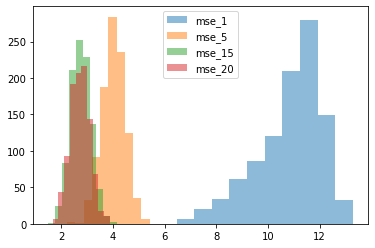

[1, 0.8944271909999159, 0.5163977794943222, 0.4472135954999579]
Mean: 10.774495084193859 Median: 11.106123072703976 Mode: [[5.77214222]] Variance: 1.6256183767032144
Mean: 9.630650134850907 Median: 9.643704654211938 Mode: [[7.30335174]] Variance: 0.6300963118308719
Mean: 6.983122669605007 Median: 6.968767645684616 Mode: [[6.00932567]] Variance: 0.09723269564653901
Mean: 5.198737876333216 Median: 5.190547233293576 Mode: [[4.47740821]] Variance: 0.0633288290690148


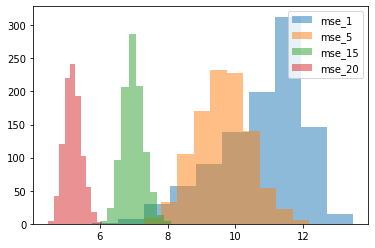

[0.5, 8.94427190999916, 15.49193338482967, 17.88854381999832]
Mean: 10.24726501120147 Median: 10.253684744852631 Mode: [[8.96305141]] Variance: 0.18656560678505907
Mean: -21.272705604507376 Median: -21.276559261636187 Mode: [[-23.87463138]] Variance: 0.6562065961641882
Mean: -21.5613225532835 Median: -21.568513005886388 Mode: [[-24.15067315]] Variance: 0.7145438872031542
Mean: -21.100512440270197 Median: -21.113371904952892 Mode: [[-23.47490495]] Variance: 0.6887927076930864


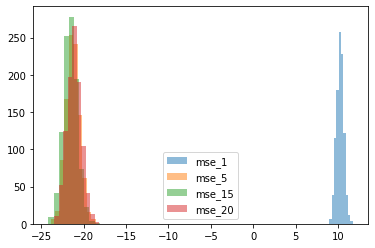

In [8]:
vary_xvars_m_num_cov(6)